In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs=datasets.make_blobs(n_samples=n_samples)
no_structure=np.random.rand(n_samples, 2), None

clustering_names=['minibatchkmeans','spectralclustering','ward','agglomerativeclustering','dbscan','birch']

color=np.array(['b','g', 'r', 'c', 'm', 'y'])
datasets=[noisy_circles,noisy_moons,blobs,no_structure]


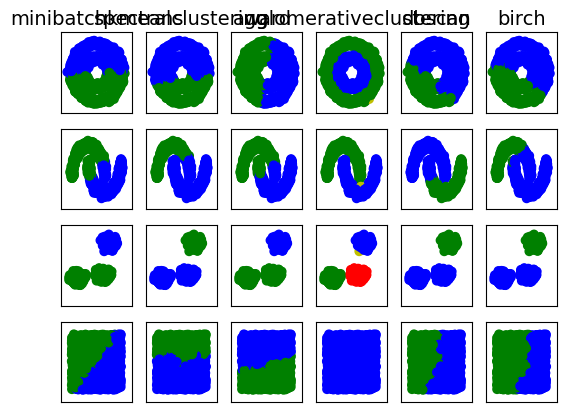

In [9]:
plt.figure()
i=1
for i_dataset, dataset in enumerate(datasets):
    x,y=dataset
    x=StandardScaler().fit_transform(x)
    two_means=cluster.MiniBatchKMeans(n_clusters=2)
    ward=cluster.AgglomerativeClustering(linkage='ward',n_clusters=2)
    spectral=cluster.SpectralClustering(n_clusters=2)
    dbscan=cluster.DBSCAN(eps=0.2)
    average=cluster.AgglomerativeClustering(linkage='average',n_clusters=2)
    birch=cluster.Birch(n_clusters=2)

    clustering_algorithms=[two_means,ward,spectral,dbscan,average,birch]
    for name, algorithm in zip(clustering_names,clustering_algorithms):
        algorithm.fit(x)
        if hasattr(algorithm,'labels_'):
            y_pred=algorithm.labels_.astype(int)
        else:
            y_pred=algorithm.predict(x)
        plt.subplot(len(datasets),len(clustering_algorithms),i)
        if i_dataset==0:
            plt.title(name, size=14)
        plt.scatter(x[:, 0], x[:, 1], c=color[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        i=i+1
